In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort nelson
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | mvomero
Processing Record 4 of Set 1 | alto araguaia
Processing Record 5 of Set 1 | whitianga
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | san jeronimo
Processing Record 15 of Set 1 | banda aceh
Processing Record 16 of Set 1 | harbour breton
Processing Record 17 of Set 1 | kahului
Processing Record 18 of Set 1 | sola
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | dingle
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | avarua
Proce

Processing Record 36 of Set 4 | souillac
Processing Record 37 of Set 4 | namioka
Processing Record 38 of Set 4 | san andres
Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | kargil
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | basmat
Processing Record 44 of Set 4 | lufilufi
Processing Record 45 of Set 4 | sioux lookout
Processing Record 46 of Set 4 | berlevag
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | acari
Processing Record 50 of Set 4 | charters towers
Processing Record 1 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 2 of Set 5 | zhezkazgan
Processing Record 3 of Set 5 | krasnoselkup
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | bashmakovo
Processing Record 6 of Set 5 | oromocto
Processing Record 7 of Set 5 | yasenskaya
Processing Record 8 of Set 5 | miraflores
Proces

Processing Record 26 of Set 8 | mitsamiouli
Processing Record 27 of Set 8 | salalah
Processing Record 28 of Set 8 | camacha
Processing Record 29 of Set 8 | harper
Processing Record 30 of Set 8 | sitka
Processing Record 31 of Set 8 | khonuu
City not found. Skipping...
Processing Record 32 of Set 8 | tallahassee
Processing Record 33 of Set 8 | bontang
Processing Record 34 of Set 8 | jiddah
City not found. Skipping...
Processing Record 35 of Set 8 | nara
Processing Record 36 of Set 8 | sibolga
Processing Record 37 of Set 8 | kathmandu
Processing Record 38 of Set 8 | severo-kurilsk
Processing Record 39 of Set 8 | teguldet
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | beruni
City not found. Skipping...
Processing Record 42 of Set 8 | basavakalyan
Processing Record 43 of Set 8 | ventspils
Processing Record 44 of Set 8 | la libertad
Processing Record 45 of Set 8 | sinnamary
Processing Record 46 of Set 8 | stoyba
City not found. Skipping...
Processing Record 47 of S

Processing Record 14 of Set 12 | hambantota
Processing Record 15 of Set 12 | san juan
Processing Record 16 of Set 12 | hinton
Processing Record 17 of Set 12 | cairns
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | nuuk
Processing Record 20 of Set 12 | nirmal
Processing Record 21 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 22 of Set 12 | pandelys
City not found. Skipping...
Processing Record 23 of Set 12 | keshan
City not found. Skipping...
Processing Record 24 of Set 12 | ozgon
City not found. Skipping...
Processing Record 25 of Set 12 | ust-ishim
Processing Record 26 of Set 12 | san rafael
Processing Record 27 of Set 12 | coihaique
Processing Record 28 of Set 12 | luwuk
Processing Record 29 of Set 12 | oranjestad
Processing Record 30 of Set 12 | bouna
Processing Record 31 of Set 12 | muros
Processing Record 32 of Set 12 | westport
Processing Record 33 of Set 12 | tecoanapa
Processing Record 34 of Set 12 | zhoucheng
Processing Record 35 of

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort Nelson,58.8053,-122.7002,62.19,72,75,4.61,CA,2021-08-15 21:41:07
1,Busselton,-33.6500,115.3333,53.04,69,0,10.54,AU,2021-08-15 21:41:32
2,Mvomero,-6.2500,38.6667,68.45,96,28,3.33,TZ,2021-08-15 21:41:32
3,Alto Araguaia,-17.3147,-53.2153,80.85,22,40,1.54,BR,2021-08-15 21:41:33
4,Whitianga,-36.8333,175.7000,53.02,58,94,8.03,NZ,2021-08-15 21:41:33
5,Bethel,41.3712,-73.4140,82.24,54,1,8.05,US,2021-08-15 21:41:04
6,Bluff,-46.6000,168.3333,53.80,68,99,17.87,NZ,2021-08-15 21:41:33
7,Bredasdorp,-34.5322,20.0403,54.28,93,64,2.30,ZA,2021-08-15 21:41:34
8,Albany,42.6001,-73.9662,77.81,59,100,1.99,US,2021-08-15 21:38:45
9,Hobart,-42.8794,147.3294,41.22,89,75,3.00,AU,2021-08-15 21:40:09


In [11]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fort Nelson,CA,2021-08-15 21:41:07,58.8053,-122.7002,62.19,72,75,4.61
1,Busselton,AU,2021-08-15 21:41:32,-33.6500,115.3333,53.04,69,0,10.54
2,Mvomero,TZ,2021-08-15 21:41:32,-6.2500,38.6667,68.45,96,28,3.33
3,Alto Araguaia,BR,2021-08-15 21:41:33,-17.3147,-53.2153,80.85,22,40,1.54
4,Whitianga,NZ,2021-08-15 21:41:33,-36.8333,175.7000,53.02,58,94,8.03
5,Bethel,US,2021-08-15 21:41:04,41.3712,-73.4140,82.24,54,1,8.05
6,Bluff,NZ,2021-08-15 21:41:33,-46.6000,168.3333,53.80,68,99,17.87
7,Bredasdorp,ZA,2021-08-15 21:41:34,-34.5322,20.0403,54.28,93,64,2.30
8,Albany,US,2021-08-15 21:38:45,42.6001,-73.9662,77.81,59,100,1.99
9,Hobart,AU,2021-08-15 21:40:09,-42.8794,147.3294,41.22,89,75,3.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

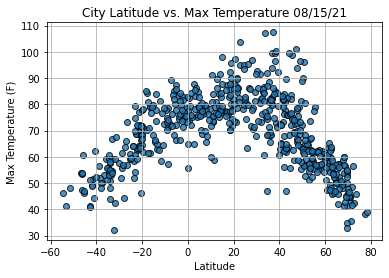

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

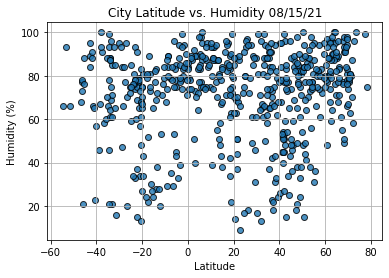

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

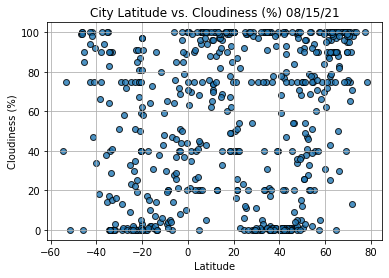

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

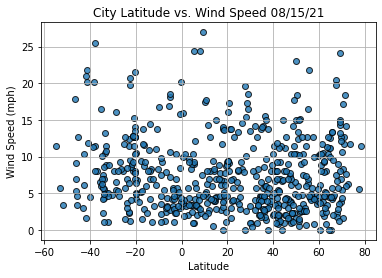

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

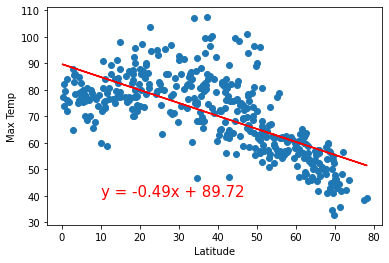

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

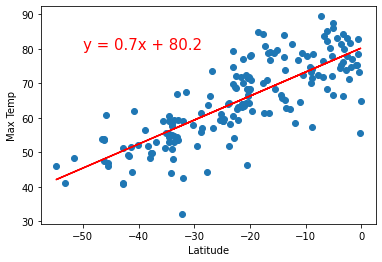

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

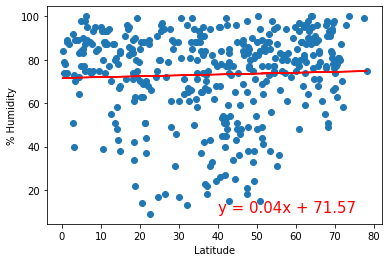

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

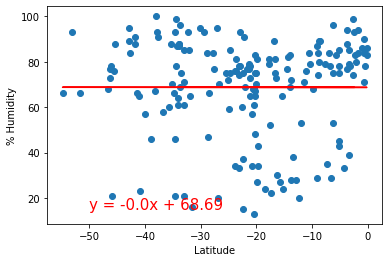

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

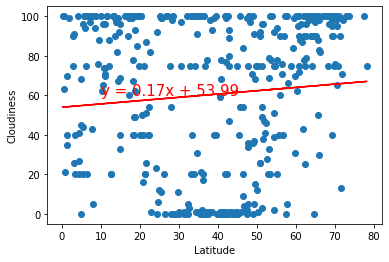

In [29]:
# SKILL DRILL
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(10,60))

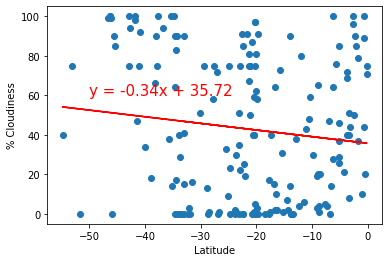

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

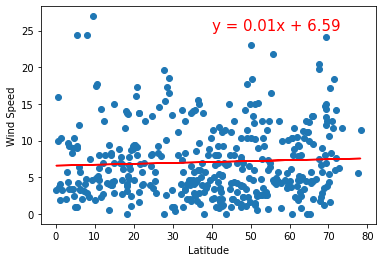

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

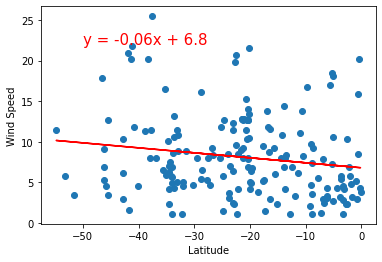

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,22))